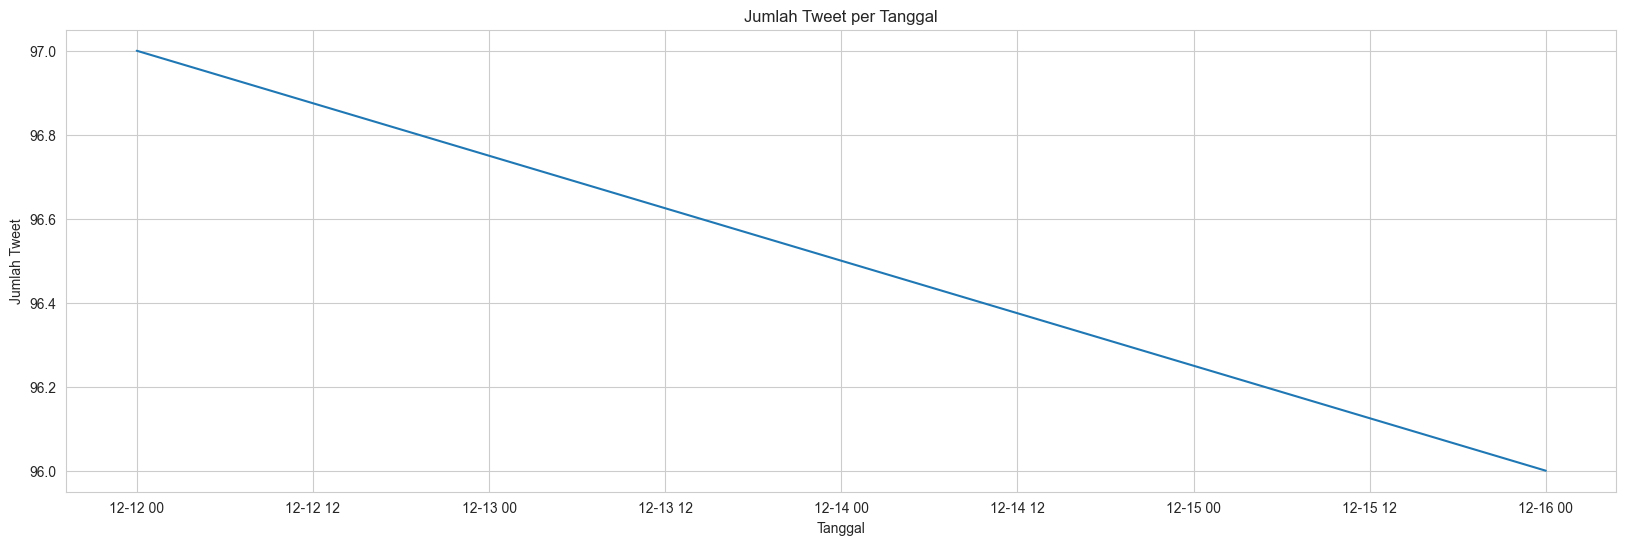

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the file path for the CSV file
file_path = "../tweets-data/Combined-File/combined.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding="utf-8")

# Convert the 'created_at' column to datetime with the appropriate format
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Calculate the count of tweets per date
grouped = df.groupby(df['created_at'].dt.date).size().reset_index(name='count tweet')

# Set seaborn style
sns.set_style("whitegrid")

# Create a line plot using seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(data=grouped, x='created_at', y='count tweet', markers='o')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Tweet')
plt.title('Jumlah Tweet per Tanggal')
plt.xticks(rotation=0)
plt.show()


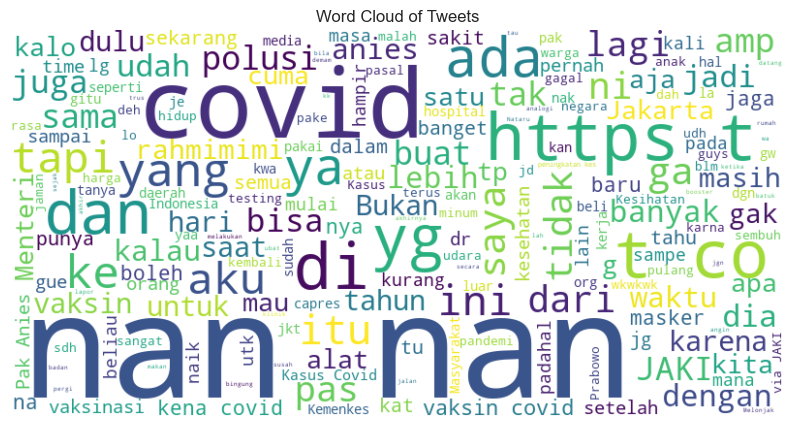

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the CSV file into a DataFrame
file_path = "../tweets-data/Combined-File/combined.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Convert 'full_text' column to strings and handle NaN values
df['full_text'] = df['full_text'].astype(str)

# Combine all tweets' text into one string
combined_text = ' '.join(df['full_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Tweets')
plt.show()
